# Word Frequency Distribution Analysis

This notebook analyzes the distribution of word frequencies in our Dutch words database. We'll examine:
- How many words occur at each frequency level
- Distribution patterns and statistics
- Visualizations of the frequency distribution
- Analysis of rare vs common words

## Setup and Data Loading

In [30]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [31]:
# Connect to the words database
db_path = r'output\words_database.sqlite'
conn = sqlite3.connect(db_path)

print("Connected to words database successfully!")

Connected to words database successfully!


## Data Exploration

In [32]:
# Get basic statistics about the database
query_stats = """
SELECT 
    COUNT(*) as total_words,
    MIN(total_frequency) as min_frequency,
    MAX(total_frequency) as max_frequency,
    AVG(total_frequency) as avg_frequency,
    SUM(total_frequency) as total_occurrences
FROM words
WHERE total_frequency > 0
"""

stats_df = pd.read_sql_query(query_stats, conn)
print("Database Statistics:")
print(f"Total unique words: {stats_df['total_words'].iloc[0]:,}")
print(f"Frequency range: {stats_df['min_frequency'].iloc[0]:,} - {stats_df['max_frequency'].iloc[0]:,}")
print(f"Average frequency: {stats_df['avg_frequency'].iloc[0]:.2f}")
print(f"Total word occurrences: {stats_df['total_occurrences'].iloc[0]:,}")

Database Statistics:
Total unique words: 841,764
Frequency range: 1 - 330,465
Average frequency: 63.62
Total word occurrences: 53,549,626


## Frequency Distribution Analysis

In [33]:
# Get frequency distribution - count how many words appear at each frequency level
query_freq_dist = """
SELECT 
    total_frequency,
    COUNT(*) as word_count
FROM words 
WHERE total_frequency > 0
GROUP BY total_frequency
ORDER BY total_frequency
"""

freq_dist_df = pd.read_sql_query(query_freq_dist, conn)
print(f"Analyzing {len(freq_dist_df)} different frequency levels")
print("\nFirst 20 frequency levels:")
print(freq_dist_df.head(20))

Analyzing 5052 different frequency levels

First 20 frequency levels:
    total_frequency  word_count
0                 1      379198
1                 2      119356
2                 3       60451
3                 4       38092
4                 5       26907
5                 6       20131
6                 7       15823
7                 8       12803
8                 9       10642
9                10        9217
10               11        7806
11               12        6777
12               13        5976
13               14        5327
14               15        4655
15               16        4314
16               17        4025
17               18        3545
18               19        3227
19               20        3002


In [34]:
# Calculate cumulative statistics
freq_dist_df['cumulative_words'] = freq_dist_df['word_count'].cumsum()
freq_dist_df['cumulative_percentage'] = (freq_dist_df['cumulative_words'] / freq_dist_df['word_count'].sum()) * 100

# Calculate total occurrences for each frequency level
freq_dist_df['total_occurrences'] = freq_dist_df['total_frequency'] * freq_dist_df['word_count']
freq_dist_df['cumulative_occurrences'] = freq_dist_df['total_occurrences'].cumsum()

print("\nFrequency distribution with cumulative data:")
print(freq_dist_df.head(10))


Frequency distribution with cumulative data:
   total_frequency  word_count  cumulative_words  cumulative_percentage  \
0                1      379198            379198              45.048018   
1                2      119356            498554              59.227289   
2                3       60451            559005              66.408756   
3                4       38092            597097              70.934015   
4                5       26907            624004              74.130516   
5                6       20131            644135              76.522042   
6                7       15823            659958              78.401785   
7                8       12803            672761              79.922757   
8                9       10642            683403              81.187007   
9               10        9217            692620              82.281970   

   total_occurrences  cumulative_occurrences  
0             379198                  379198  
1             238712              

## Key Statistics and Insights

In [35]:
# Calculate key statistics
total_words = freq_dist_df['word_count'].sum()
total_occurrences = freq_dist_df['total_occurrences'].sum()

# Words that appear only once (hapax legomena)
hapax_count = freq_dist_df[freq_dist_df['total_frequency'] == 1]['word_count'].iloc[0] if len(freq_dist_df[freq_dist_df['total_frequency'] == 1]) > 0 else 0
hapax_percentage = (hapax_count / total_words) * 100

# Words that appear twice (dis legomena)
dis_count = freq_dist_df[freq_dist_df['total_frequency'] == 2]['word_count'].iloc[0] if len(freq_dist_df[freq_dist_df['total_frequency'] == 2]) > 0 else 0
dis_percentage = (dis_count / total_words) * 100

# Rare words (frequency <= 5)
rare_words = freq_dist_df[freq_dist_df['total_frequency'] <= 5]['word_count'].sum()
rare_percentage = (rare_words / total_words) * 100

# Common words (frequency >= 100)
common_words = freq_dist_df[freq_dist_df['total_frequency'] >= 100]['word_count'].sum()
common_percentage = (common_words / total_words) * 100

print("=== FREQUENCY DISTRIBUTION INSIGHTS ===")
print(f"\nTotal unique words: {total_words:,}")
print(f"Total word occurrences: {total_occurrences:,}")
print(f"\n📊 RARE WORDS ANALYSIS:")
print(f"Words appearing exactly once (hapax legomena): {hapax_count:,} ({hapax_percentage:.1f}%)")
print(f"Words appearing exactly twice (dis legomena): {dis_count:,} ({dis_percentage:.1f}%)")
print(f"Words appearing 5 times or less: {rare_words:,} ({rare_percentage:.1f}%)")
print(f"\n🔥 COMMON WORDS ANALYSIS:")
print(f"Words appearing 100+ times: {common_words:,} ({common_percentage:.1f}%)")

# Most frequent frequency levels
print(f"\n📈 TOP FREQUENCY LEVELS (most words):")
top_freq_levels = freq_dist_df.nlargest(10, 'word_count')[['total_frequency', 'word_count']]
for _, row in top_freq_levels.iterrows():
    print(f"Frequency {row['total_frequency']}: {row['word_count']:,} words")

=== FREQUENCY DISTRIBUTION INSIGHTS ===

Total unique words: 841,764
Total word occurrences: 53,549,626

📊 RARE WORDS ANALYSIS:
Words appearing exactly once (hapax legomena): 379,198 (45.0%)
Words appearing exactly twice (dis legomena): 119,356 (14.2%)
Words appearing 5 times or less: 624,004 (74.1%)

🔥 COMMON WORDS ANALYSIS:
Words appearing 100+ times: 37,437 (4.4%)

📈 TOP FREQUENCY LEVELS (most words):
Frequency 1: 379,198 words
Frequency 2: 119,356 words
Frequency 3: 60,451 words
Frequency 4: 38,092 words
Frequency 5: 26,907 words
Frequency 6: 20,131 words
Frequency 7: 15,823 words
Frequency 8: 12,803 words
Frequency 9: 10,642 words
Frequency 10: 9,217 words


## Visualizations

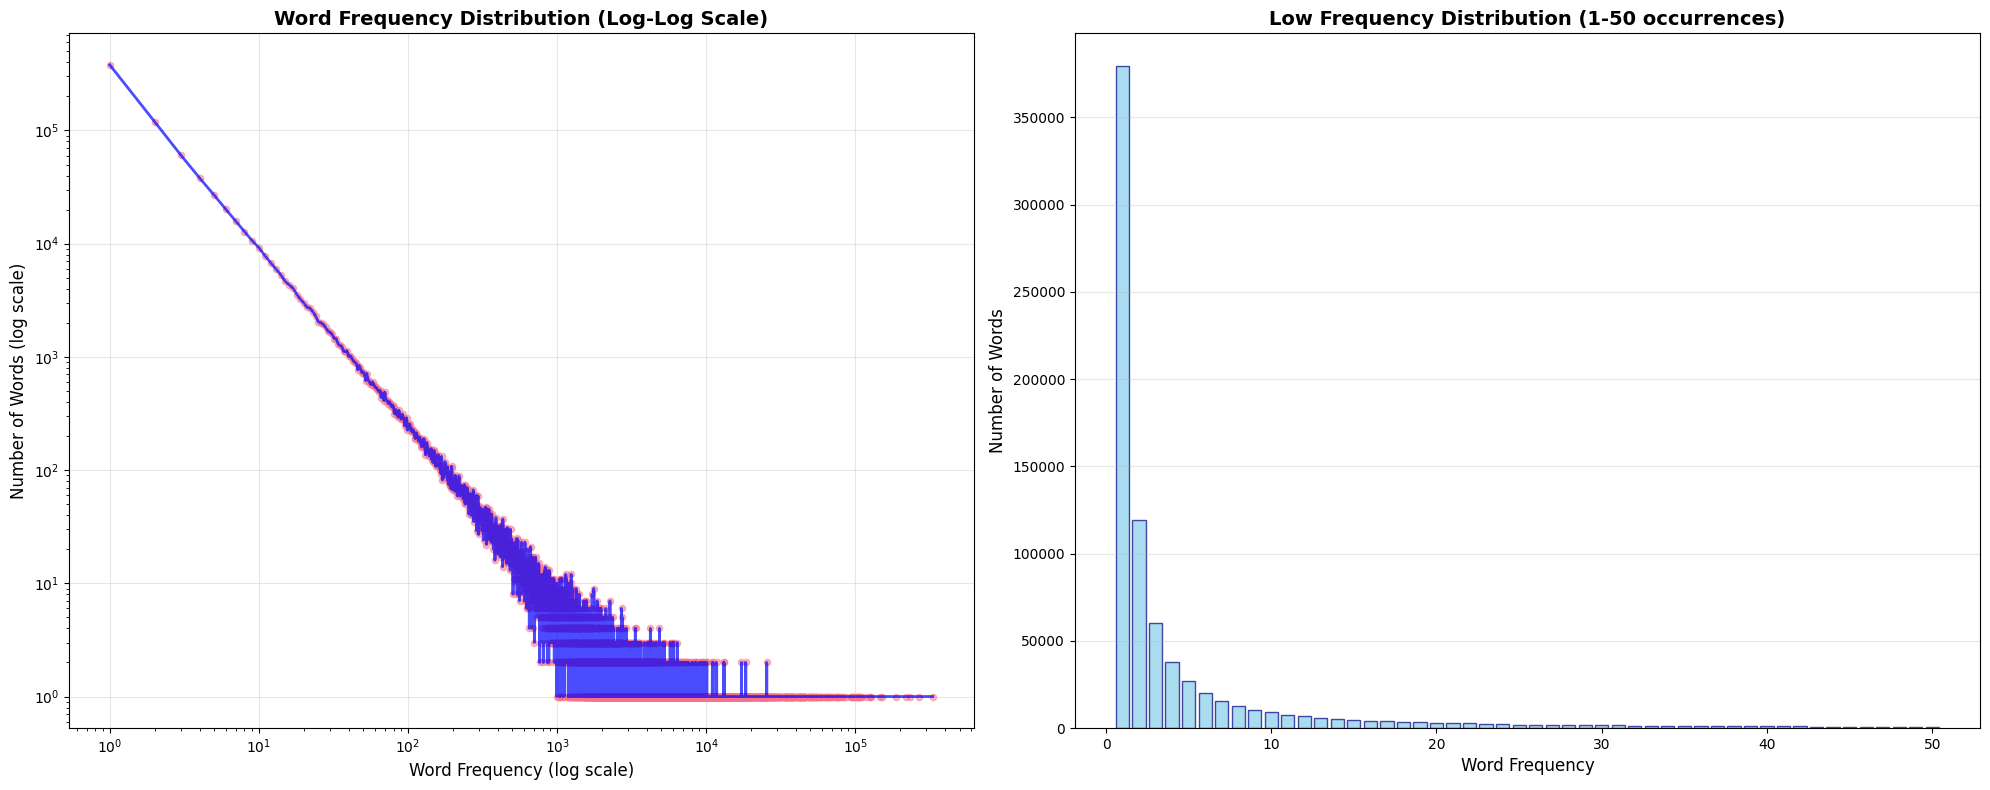

In [22]:
# Plot 1: Overall frequency distribution (log scale)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Left plot: Full distribution (log-log scale)
ax1.loglog(freq_dist_df['total_frequency'], freq_dist_df['word_count'], 'b-', alpha=0.7, linewidth=2)
ax1.scatter(freq_dist_df['total_frequency'], freq_dist_df['word_count'], alpha=0.5, s=20)
ax1.set_xlabel('Word Frequency (log scale)', fontsize=12)
ax1.set_ylabel('Number of Words (log scale)', fontsize=12)
ax1.set_title('Word Frequency Distribution (Log-Log Scale)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Right plot: Low frequency focus (linear scale)
low_freq = freq_dist_df[freq_dist_df['total_frequency'] <= 50]
ax2.bar(low_freq['total_frequency'], low_freq['word_count'], alpha=0.7, color='skyblue', edgecolor='navy')
ax2.set_xlabel('Word Frequency', fontsize=12)
ax2.set_ylabel('Number of Words', fontsize=12)
ax2.set_title('Low Frequency Distribution (1-50 occurrences)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

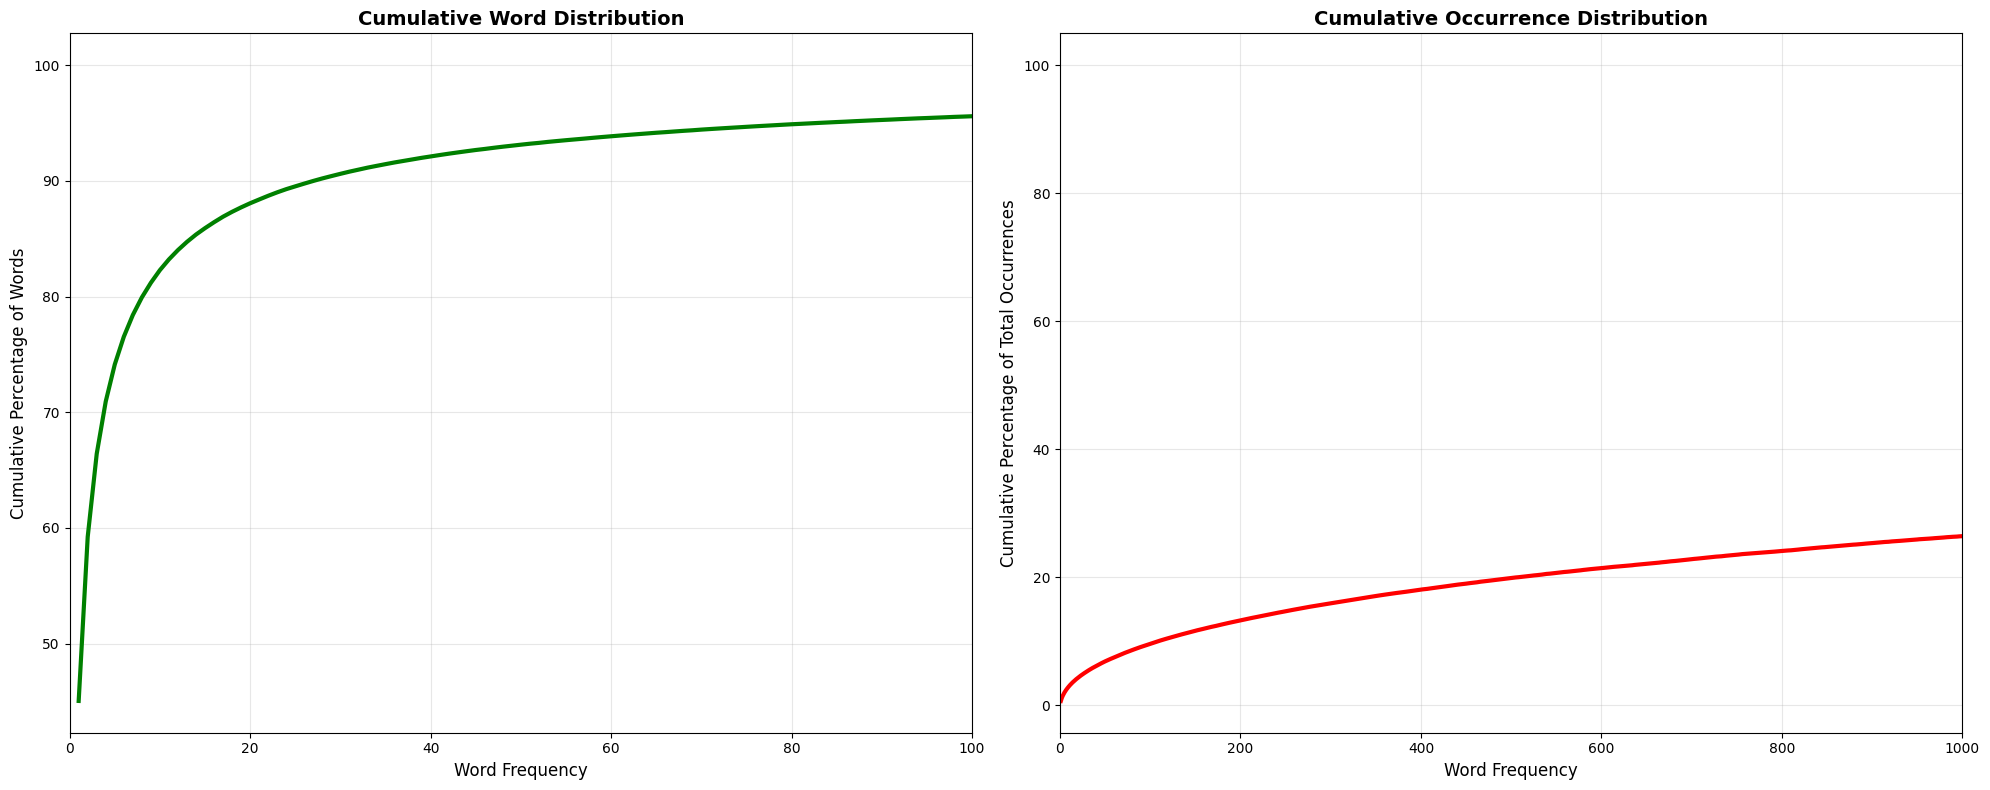

In [23]:
# Plot 2: Cumulative distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Left: Cumulative word count
ax1.plot(freq_dist_df['total_frequency'], freq_dist_df['cumulative_percentage'], 'g-', linewidth=3)
ax1.set_xlabel('Word Frequency', fontsize=12)
ax1.set_ylabel('Cumulative Percentage of Words', fontsize=12)
ax1.set_title('Cumulative Word Distribution', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 100)  # Focus on lower frequencies

# Right: Cumulative occurrences
cumulative_occ_pct = (freq_dist_df['cumulative_occurrences'] / freq_dist_df['total_occurrences'].sum()) * 100
ax2.plot(freq_dist_df['total_frequency'], cumulative_occ_pct, 'r-', linewidth=3)
ax2.set_xlabel('Word Frequency', fontsize=12)
ax2.set_ylabel('Cumulative Percentage of Total Occurrences', fontsize=12)
ax2.set_title('Cumulative Occurrence Distribution', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 1000)  # Focus on reasonable range

plt.tight_layout()
plt.show()

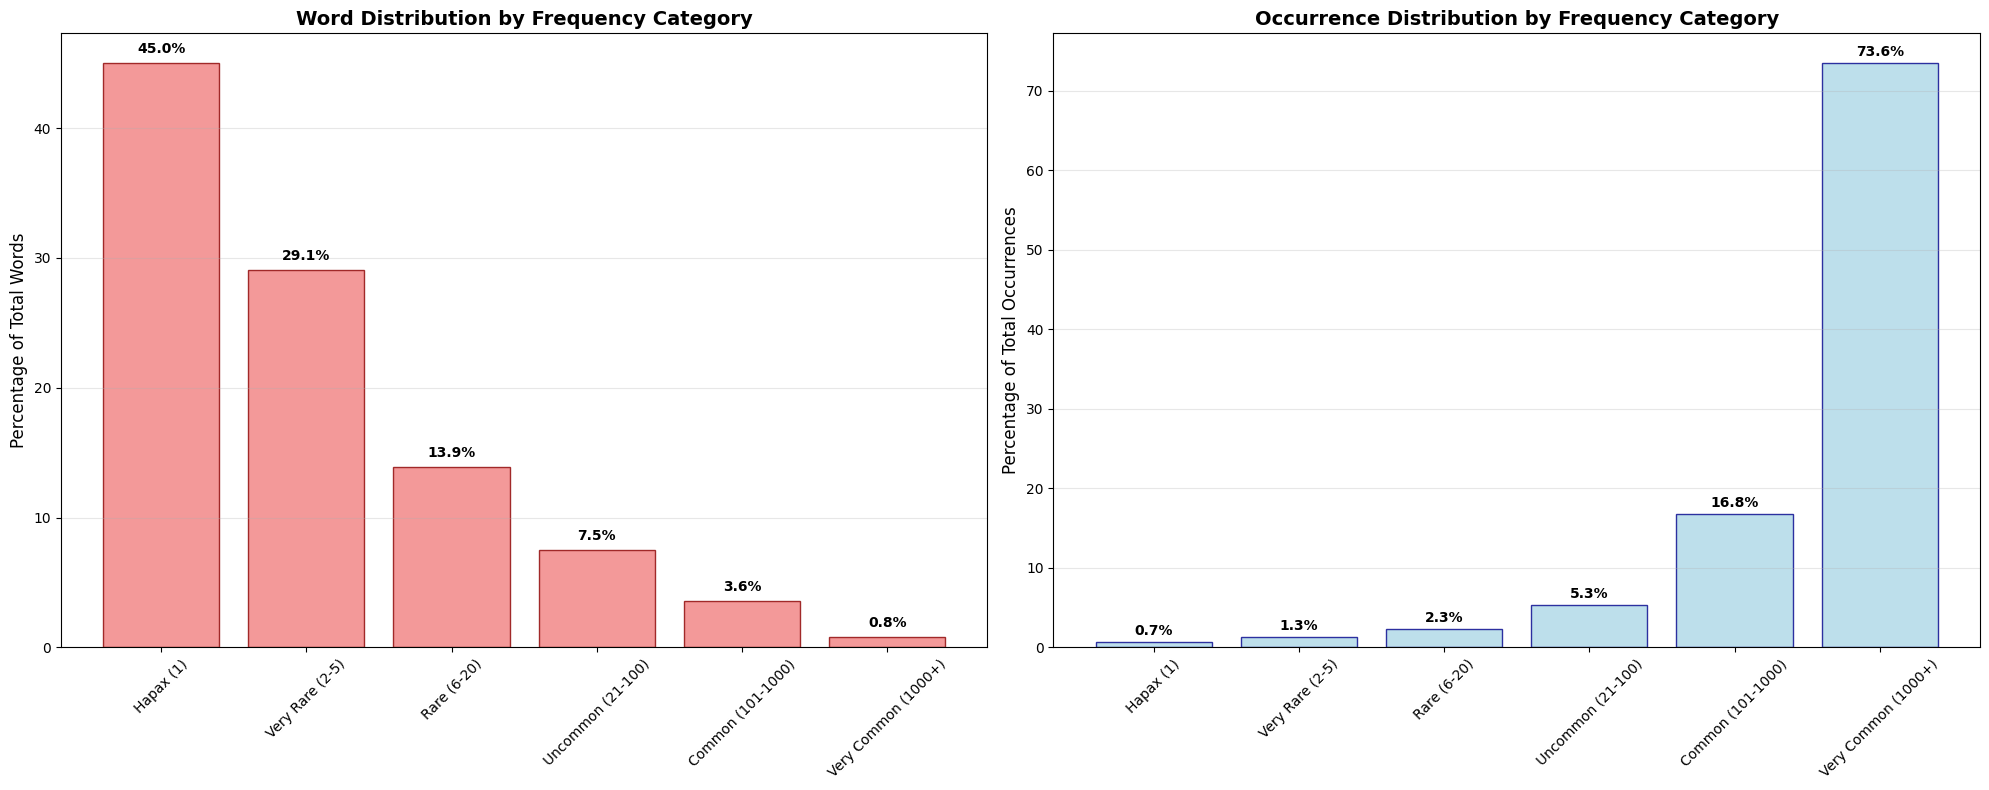


=== FREQUENCY CATEGORY BREAKDOWN ===
           category  word_count  total_occurrences  word_percentage  occurrence_percentage
          Hapax (1)      379198             379198             45.0                    0.7
    Very Rare (2-5)      244806             706968             29.1                    1.3
        Rare (6-20)      117270            1233812             13.9                    2.3
  Uncommon (21-100)       63305            2839816              7.5                    5.3
  Common (101-1000)       30129            9000410              3.6                   16.8
Very Common (1000+)        7056           39389422              0.8                   73.6


In [24]:
# Plot 3: Frequency categories analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Define frequency categories
categories = [
    ('Hapax (1)', 1, 1),
    ('Very Rare (2-5)', 2, 5),
    ('Rare (6-20)', 6, 20),
    ('Uncommon (21-100)', 21, 100),
    ('Common (101-1000)', 101, 1000),
    ('Very Common (1000+)', 1001, float('inf'))
]

category_data = []
for name, min_freq, max_freq in categories:
    if max_freq == float('inf'):
        mask = freq_dist_df['total_frequency'] >= min_freq
    else:
        mask = (freq_dist_df['total_frequency'] >= min_freq) & (freq_dist_df['total_frequency'] <= max_freq)
    
    word_count = freq_dist_df[mask]['word_count'].sum()
    total_occ = freq_dist_df[mask]['total_occurrences'].sum()
    category_data.append({
        'category': name,
        'word_count': word_count,
        'total_occurrences': total_occ,
        'word_percentage': (word_count / total_words) * 100,
        'occurrence_percentage': (total_occ / total_occurrences) * 100
    })

category_df = pd.DataFrame(category_data)

# Left: Word count by category
bars1 = ax1.bar(category_df['category'], category_df['word_percentage'], 
                color='lightcoral', alpha=0.8, edgecolor='darkred')
ax1.set_ylabel('Percentage of Total Words', fontsize=12)
ax1.set_title('Word Distribution by Frequency Category', fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, val in zip(bars1, category_df['word_percentage']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{val:.1f}%', ha='center', va='bottom', fontweight='bold')

# Right: Total occurrences by category
bars2 = ax2.bar(category_df['category'], category_df['occurrence_percentage'], 
                color='lightblue', alpha=0.8, edgecolor='darkblue')
ax2.set_ylabel('Percentage of Total Occurrences', fontsize=12)
ax2.set_title('Occurrence Distribution by Frequency Category', fontsize=14, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, val in zip(bars2, category_df['occurrence_percentage']):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{val:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n=== FREQUENCY CATEGORY BREAKDOWN ===")
print(category_df.to_string(index=False, float_format='%.1f'))

## Frequency Categories vs Word Categories (POS) Analysis

In [36]:
# Get detailed breakdown by frequency categories and POS categories
query_freq_pos = """
SELECT 
    total_frequency,
    pos_category,
    COUNT(*) as word_count
FROM words 
WHERE total_frequency > 0 AND pos_category IS NOT NULL
GROUP BY total_frequency, pos_category
ORDER BY total_frequency, pos_category
"""

freq_pos_df = pd.read_sql_query(query_freq_pos, conn)

# Apply the same frequency categories as before
def categorize_frequency(freq):
    if freq == 1:
        return 'Hapax (1)'
    elif 2 <= freq <= 5:
        return 'Very Rare (2-5)'
    elif 6 <= freq <= 20:
        return 'Rare (6-20)'
    elif 21 <= freq <= 100:
        return 'Uncommon (21-100)'
    elif 101 <= freq <= 1000:
        return 'Common (101-1000)'
    else:
        return 'Very Common (1000+)'

freq_pos_df['frequency_category'] = freq_pos_df['total_frequency'].apply(categorize_frequency)

# Group by frequency category and POS category
freq_pos_summary = freq_pos_df.groupby(['frequency_category', 'pos_category'])['word_count'].sum().reset_index()

print("Frequency vs POS Categories - Sample Data:")
print(freq_pos_summary.head(20))
print(f"\nTotal combinations: {len(freq_pos_summary)}")
print(f"POS categories found: {sorted(freq_pos_summary['pos_category'].unique())}")
print(f"Frequency categories: {sorted(freq_pos_summary['frequency_category'].unique())}")

Frequency vs POS Categories - Sample Data:
   frequency_category  pos_category  word_count
0   Common (101-1000)     adjective        2937
1   Common (101-1000)        adverb         301
2   Common (101-1000)     auxiliary          10
3   Common (101-1000)   conjunction          17
4   Common (101-1000)    determiner          27
5   Common (101-1000)  interjection           9
6   Common (101-1000)          noun       11426
7   Common (101-1000)        number          30
8   Common (101-1000)         other         397
9   Common (101-1000)   preposition          45
10  Common (101-1000)       pronoun          41
11  Common (101-1000)   proper_noun        9041
12  Common (101-1000)          verb        5848
13          Hapax (1)     adjective       33206
14          Hapax (1)        adverb        6744
15          Hapax (1)     auxiliary         645
16          Hapax (1)   conjunction         538
17          Hapax (1)    determiner        1536
18          Hapax (1)  interjection         2

In [37]:
# Create pivot table for heatmap
pivot_table = freq_pos_summary.pivot(index='frequency_category', columns='pos_category', values='word_count')
pivot_table = pivot_table.fillna(0)

# Calculate percentages for each frequency category (row-wise percentages)
pivot_table_pct = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

print("Pivot table (word counts):")
print(pivot_table)
print("\nPivot table (percentages within frequency categories):")
print(pivot_table_pct.round(1))

Pivot table (word counts):
pos_category         adjective  adverb  auxiliary  conjunction  determiner  \
frequency_category                                                           
Common (101-1000)         2937     301         10           17          27   
Hapax (1)                33206    6744        645          538        1536   
Rare (6-20)               9772    1506         86           86         200   
Uncommon (21-100)         5551     629         24           47          78   
Very Common (1000+)        950     158          3           10          14   
Very Rare (2-5)          20598    3790        298          261         640   

pos_category         interjection    noun  number  other  preposition  \
frequency_category                                                      
Common (101-1000)               9   11426      30    397           45   
Hapax (1)                     296  164387    1121  16752         1159   
Rare (6-20)                    57   46422     183   3140

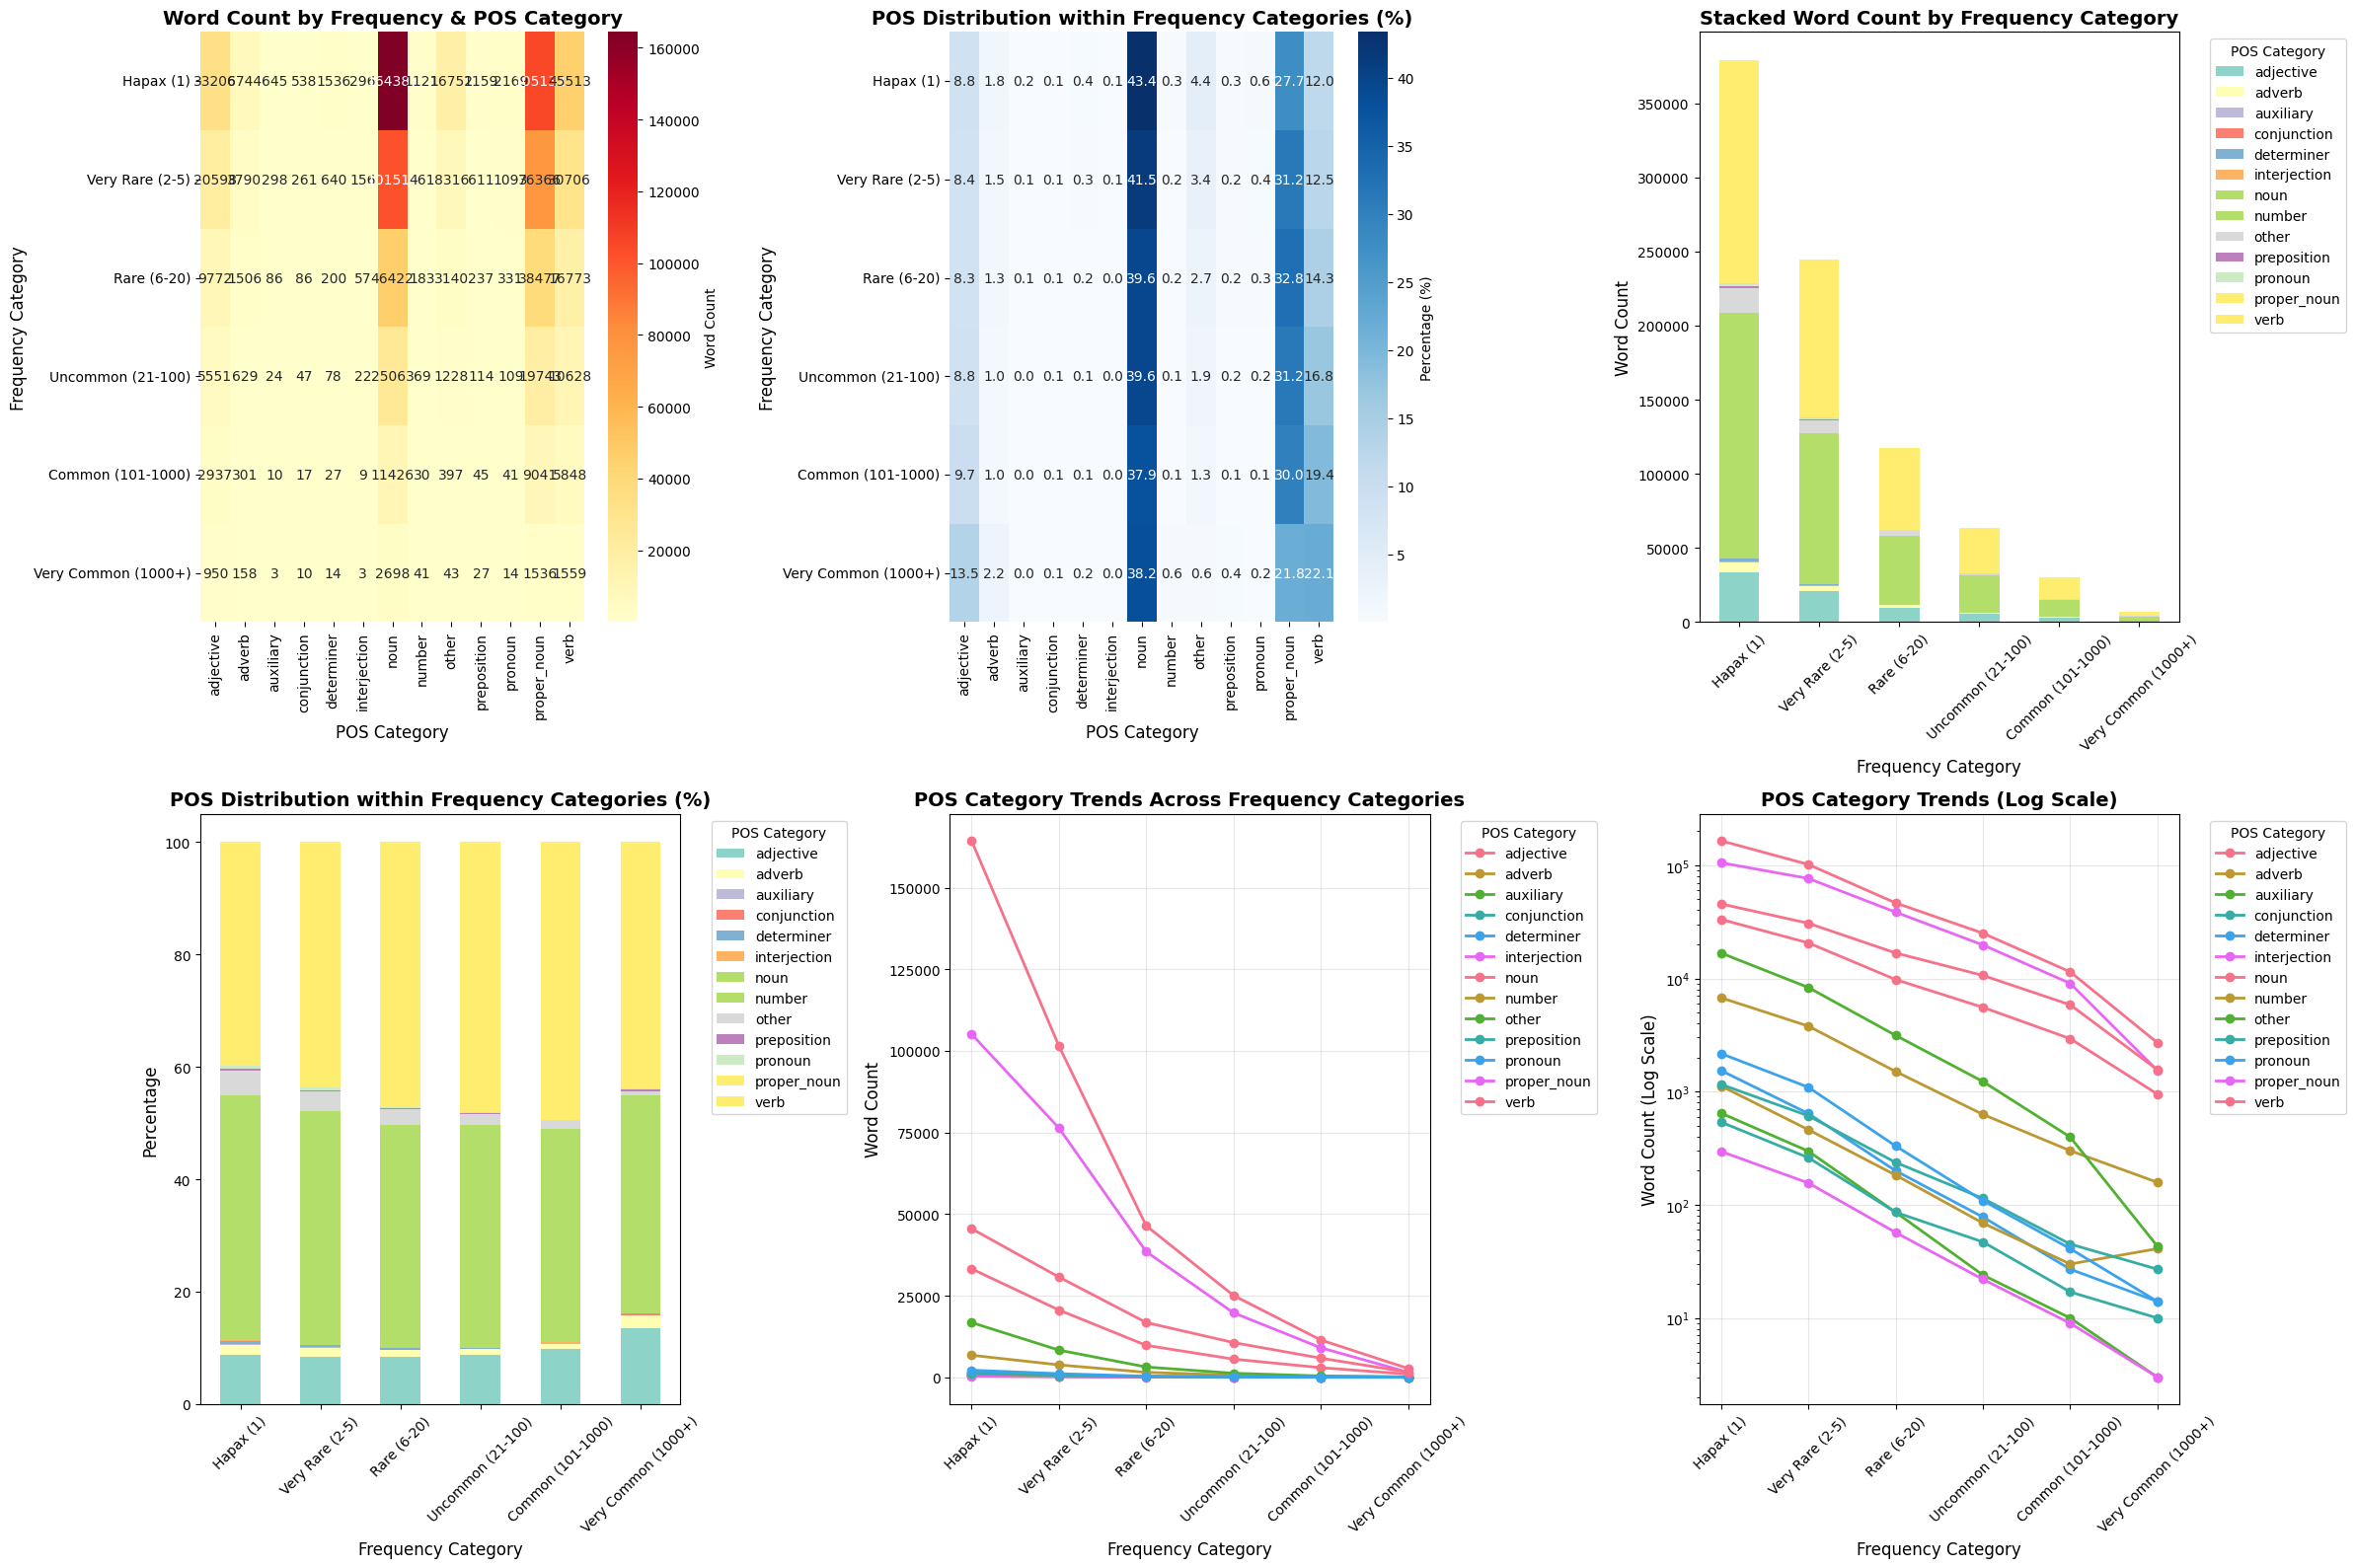

In [38]:
# Create comprehensive visualizations
fig = plt.figure(figsize=(24, 16))

# Define the order for frequency categories (from rare to common)
freq_order = ['Hapax (1)', 'Very Rare (2-5)', 'Rare (6-20)', 'Uncommon (21-100)', 'Common (101-1000)', 'Very Common (1000+)']

# Reorder the pivot table
pivot_table_ordered = pivot_table.reindex(freq_order)
pivot_table_pct_ordered = pivot_table_pct.reindex(freq_order)

# Plot 1: Heatmap of word counts
ax1 = plt.subplot(2, 3, 1)
sns.heatmap(pivot_table_ordered, annot=True, fmt='.0f', cmap='YlOrRd', 
            cbar_kws={'label': 'Word Count'}, ax=ax1)
ax1.set_title('Word Count by Frequency & POS Category', fontsize=14, fontweight='bold')
ax1.set_xlabel('POS Category', fontsize=12)
ax1.set_ylabel('Frequency Category', fontsize=12)

# Plot 2: Heatmap of percentages within frequency categories
ax2 = plt.subplot(2, 3, 2)
sns.heatmap(pivot_table_pct_ordered, annot=True, fmt='.1f', cmap='Blues', 
            cbar_kws={'label': 'Percentage (%)'}, ax=ax2)
ax2.set_title('POS Distribution within Frequency Categories (%)', fontsize=14, fontweight='bold')
ax2.set_xlabel('POS Category', fontsize=12)
ax2.set_ylabel('Frequency Category', fontsize=12)

# Plot 3: Stacked bar chart for each frequency category
ax3 = plt.subplot(2, 3, 3)
pivot_table_ordered.plot(kind='bar', stacked=True, ax=ax3, colormap='Set3')
ax3.set_title('Stacked Word Count by Frequency Category', fontsize=14, fontweight='bold')
ax3.set_xlabel('Frequency Category', fontsize=12)
ax3.set_ylabel('Word Count', fontsize=12)
ax3.legend(title='POS Category', bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.tick_params(axis='x', rotation=45)

# Plot 4: Normalized stacked bar chart (percentages)
ax4 = plt.subplot(2, 3, 4)
pivot_table_pct_ordered.plot(kind='bar', stacked=True, ax=ax4, colormap='Set3')
ax4.set_title('POS Distribution within Frequency Categories (%)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Frequency Category', fontsize=12)
ax4.set_ylabel('Percentage', fontsize=12)
ax4.legend(title='POS Category', bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.tick_params(axis='x', rotation=45)

# Plot 5: Individual POS category trends across frequency categories
ax5 = plt.subplot(2, 3, 5)
for pos in pivot_table_ordered.columns:
    ax5.plot(range(len(freq_order)), pivot_table_ordered[pos], marker='o', linewidth=2, label=pos)
ax5.set_xticks(range(len(freq_order)))
ax5.set_xticklabels(freq_order, rotation=45)
ax5.set_title('POS Category Trends Across Frequency Categories', fontsize=14, fontweight='bold')
ax5.set_xlabel('Frequency Category', fontsize=12)
ax5.set_ylabel('Word Count', fontsize=12)
ax5.legend(title='POS Category', bbox_to_anchor=(1.05, 1), loc='upper left')
ax5.grid(True, alpha=0.3)

# Plot 6: Log scale trends
ax6 = plt.subplot(2, 3, 6)
for pos in pivot_table_ordered.columns:
    # Only plot if there are non-zero values
    values = pivot_table_ordered[pos]
    if values.sum() > 0:
        # Replace 0s with small value for log scale
        values_log = values.replace(0, 0.1)
        ax6.semilogy(range(len(freq_order)), values_log, marker='o', linewidth=2, label=pos)
ax6.set_xticks(range(len(freq_order)))
ax6.set_xticklabels(freq_order, rotation=45)
ax6.set_title('POS Category Trends (Log Scale)', fontsize=14, fontweight='bold')
ax6.set_xlabel('Frequency Category', fontsize=12)
ax6.set_ylabel('Word Count (Log Scale)', fontsize=12)
ax6.legend(title='POS Category', bbox_to_anchor=(1.05, 1), loc='upper left')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [39]:
# Detailed statistical analysis
print("=== FREQUENCY vs POS CATEGORY INSIGHTS ===")

# Total words by POS category across all frequencies
pos_totals = freq_pos_summary.groupby('pos_category')['word_count'].sum().sort_values(ascending=False)
print(f"\n📊 TOTAL WORDS BY POS CATEGORY:")
for pos, count in pos_totals.items():
    percentage = (count / pos_totals.sum()) * 100
    print(f"{pos}: {count:,} words ({percentage:.1f}%)")

# Analysis for each frequency category
print(f"\n🔍 DETAILED BREAKDOWN BY FREQUENCY CATEGORY:")
for freq_cat in freq_order:
    if freq_cat in pivot_table_ordered.index:
        freq_data = pivot_table_ordered.loc[freq_cat]
        total_in_freq = freq_data.sum()
        print(f"\n{freq_cat} - Total: {total_in_freq:,} words")
        
        # Top 3 POS categories in this frequency range
        top_pos = freq_data.nlargest(3)
        for i, (pos, count) in enumerate(top_pos.items(), 1):
            if count > 0:
                percentage = (count / total_in_freq) * 100
                print(f"  {i}. {pos}: {count:,} words ({percentage:.1f}%)")

# Find interesting patterns
print(f"\n🎯 INTERESTING PATTERNS:")

# POS categories that are more common in rare vs common words
rare_categories = ['Hapax (1)', 'Very Rare (2-5)', 'Rare (6-20)']
common_categories = ['Common (101-1000)', 'Very Common (1000+)']

rare_totals = pivot_table_ordered.loc[rare_categories].sum()
common_totals = pivot_table_ordered.loc[common_categories].sum()

print("\nPOS categories favoring RARE words:")
for pos in pivot_table_ordered.columns:
    if rare_totals[pos] > 0 and common_totals[pos] > 0:
        rare_ratio = rare_totals[pos] / (rare_totals[pos] + common_totals[pos])
        if rare_ratio > 0.7:  # More than 70% in rare categories
            print(f"  - {pos}: {rare_ratio:.1%} of words are rare")

print("\nPOS categories favoring COMMON words:")
for pos in pivot_table_ordered.columns:
    if rare_totals[pos] > 0 and common_totals[pos] > 0:
        common_ratio = common_totals[pos] / (rare_totals[pos] + common_totals[pos])
        if common_ratio > 0.5:  # More than 50% in common categories
            print(f"  - {pos}: {common_ratio:.1%} of words are common/very common")

# Diversity analysis - which POS categories appear across all frequency ranges
print(f"\n📈 POS CATEGORY FREQUENCY DIVERSITY:")
for pos in pivot_table_ordered.columns:
    non_zero_freq_cats = (pivot_table_ordered[pos] > 0).sum()
    print(f"{pos}: appears in {non_zero_freq_cats}/{len(freq_order)} frequency categories")

=== FREQUENCY vs POS CATEGORY INSIGHTS ===

📊 TOTAL WORDS BY POS CATEGORY:
noun: 351,506 words (41.8%)
proper_noun: 250,295 words (29.7%)
verb: 111,027 words (13.2%)
adjective: 73,014 words (8.7%)
other: 29,876 words (3.5%)
adverb: 13,128 words (1.6%)
pronoun: 3,757 words (0.4%)
determiner: 2,495 words (0.3%)
preposition: 2,193 words (0.3%)
number: 1,905 words (0.2%)
auxiliary: 1,066 words (0.1%)
conjunction: 959 words (0.1%)
interjection: 543 words (0.1%)

🔍 DETAILED BREAKDOWN BY FREQUENCY CATEGORY:

Hapax (1) - Total: 379,198 words
  1. noun: 164,387 words (43.4%)
  2. proper_noun: 105,132 words (27.7%)
  3. verb: 45,513 words (12.0%)

Very Rare (2-5) - Total: 244,806 words
  1. noun: 101,510 words (41.5%)
  2. proper_noun: 76,366 words (31.2%)
  3. verb: 30,706 words (12.5%)

Rare (6-20) - Total: 117,270 words
  1. noun: 46,422 words (39.6%)
  2. proper_noun: 38,477 words (32.8%)
  3. verb: 16,773 words (14.3%)

Uncommon (21-100) - Total: 63,305 words
  1. noun: 25,063 words (39.6%)

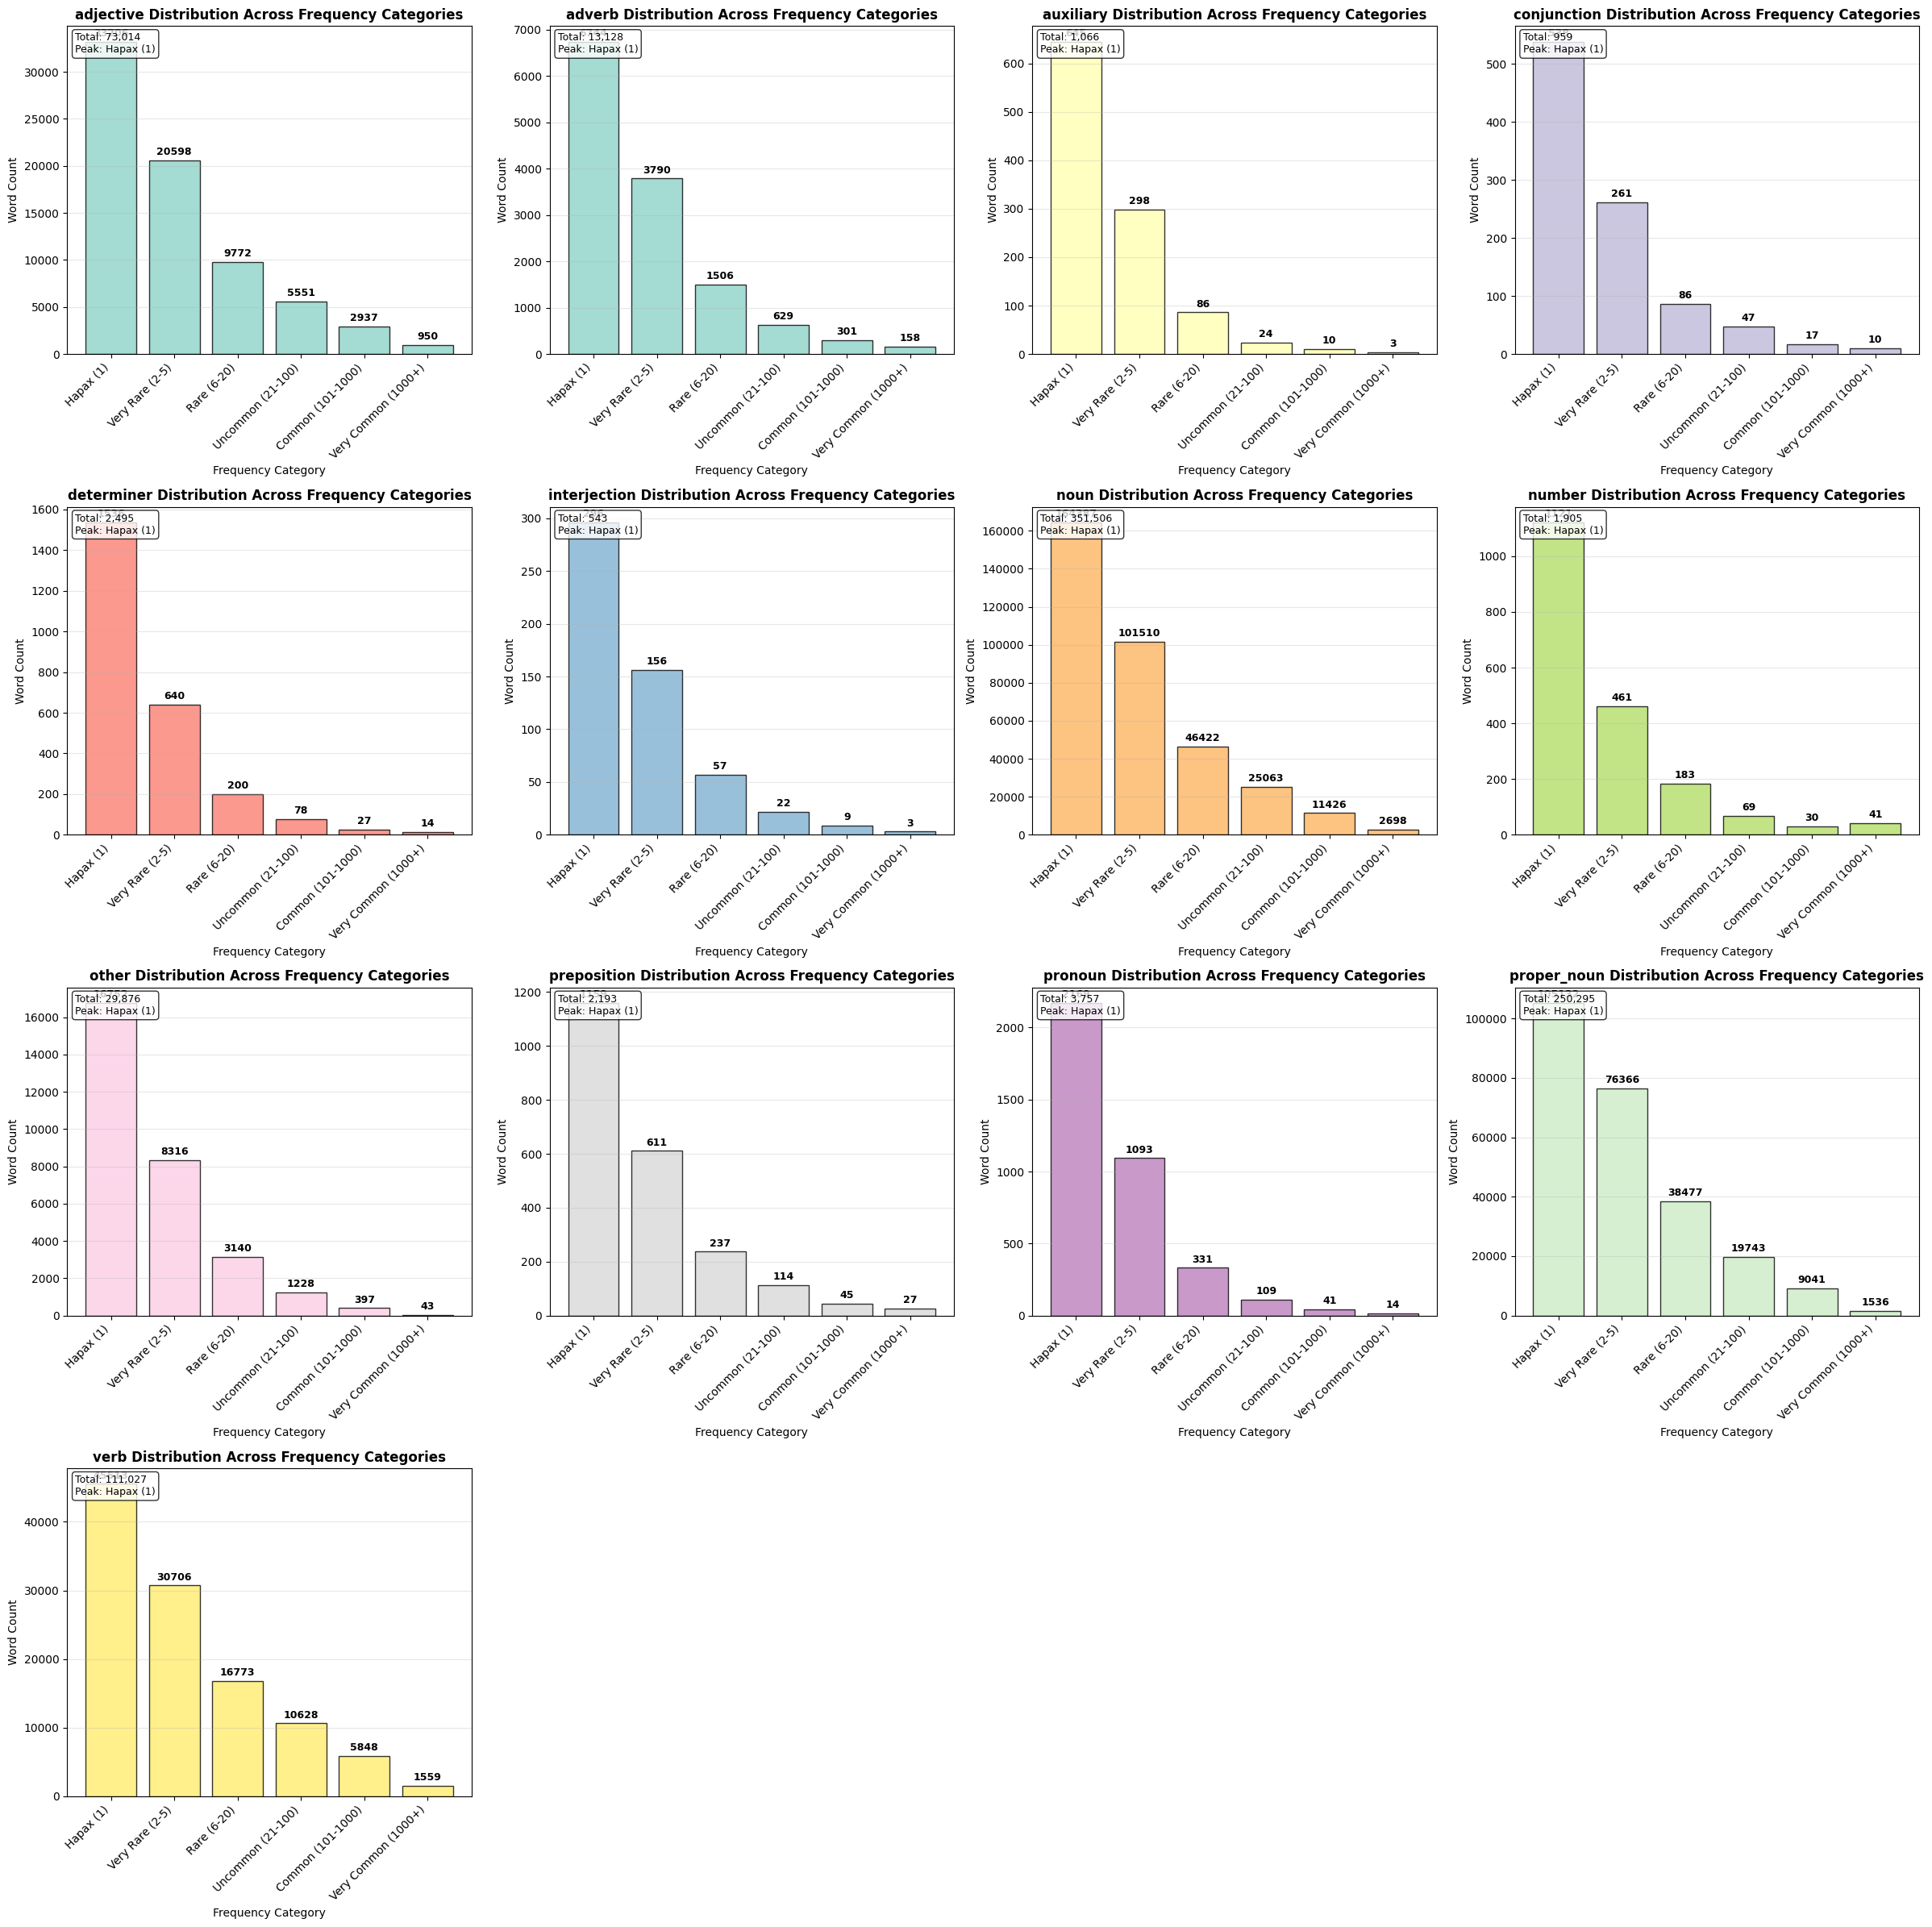

=== SUMMARY TABLE: POS CATEGORIES vs FREQUENCY CATEGORIES ===
pos_category         adjective  adverb  auxiliary  conjunction  determiner  interjection    noun  number  other  preposition  pronoun  proper_noun    verb   Total
frequency_category                                                                                                                                                
Hapax (1)                33206    6744        645          538        1536           296  164387    1121  16752         1159     2169       105132   45513  379198
Very Rare (2-5)          20598    3790        298          261         640           156  101510     461   8316          611     1093        76366   30706  244806
Rare (6-20)               9772    1506         86           86         200            57   46422     183   3140          237      331        38477   16773  117270
Uncommon (21-100)         5551     629         24           47          78            22   25063      69   1228          11

In [43]:
# Individual POS category analysis with separate plots
pos_categories = list(pivot_table_ordered.columns)
n_pos = len(pos_categories)

# Calculate grid size to fit all POS categories
n_cols = 4  # 4 columns for better layout
n_rows = (n_pos + n_cols - 1) // n_cols  # Calculate rows needed

# Create subplots for each POS category
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 6 * n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_pos == 1 else axes

for i, pos in enumerate(pos_categories):  # Show ALL POS categories
    if i < len(axes):
        ax = axes[i]
        
        # Get data for this POS category
        pos_data = pivot_table_ordered[pos]
        
        # Create bar chart
        bars = ax.bar(range(len(freq_order)), pos_data, 
                     color=plt.cm.Set3(i/len(pos_categories)), alpha=0.8, edgecolor='black')
        
        ax.set_title(f'{pos} Distribution Across Frequency Categories', 
                    fontsize=12, fontweight='bold')
        ax.set_xlabel('Frequency Category', fontsize=10)
        ax.set_ylabel('Word Count', fontsize=10)
        ax.set_xticks(range(len(freq_order)))
        ax.set_xticklabels(freq_order, rotation=45, ha='right')
        ax.grid(True, alpha=0.3, axis='y')
        
        # Add value labels on bars
        for bar, val in zip(bars, pos_data):
            if val > 0:
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(pos_data)*0.01, 
                       f'{int(val)}', ha='center', va='bottom', fontsize=9, fontweight='bold')
        
        # Add summary stats
        total_words = pos_data.sum()
        most_common_freq = pos_data.idxmax() if pos_data.sum() > 0 else "None"
        ax.text(0.02, 0.98, f'Total: {total_words:,}\nPeak: {most_common_freq}', 
               transform=ax.transAxes, fontsize=9, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Hide empty subplots
for i in range(n_pos, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Summary table for easy reference
print("=== SUMMARY TABLE: POS CATEGORIES vs FREQUENCY CATEGORIES ===")
summary_table = pivot_table_ordered.copy()
summary_table['Total'] = summary_table.sum(axis=1)
summary_table.loc['Total'] = summary_table.sum()
print(summary_table.to_string(float_format='%.0f'))

## Detailed Analysis Tables

In [ ]:
# Show most populated frequency levels
print("=== TOP 20 FREQUENCY LEVELS (by number of words) ===")
top_20_freq = freq_dist_df.nlargest(20, 'word_count')[['total_frequency', 'word_count', 'total_occurrences']]
top_20_freq['percentage_of_words'] = (top_20_freq['word_count'] / total_words) * 100
top_20_freq['percentage_of_occurrences'] = (top_20_freq['total_occurrences'] / total_occurrences) * 100

print(top_20_freq.to_string(index=False, float_format='%.2f'))

=== TOP 20 FREQUENCY LEVELS (by number of words) ===
 total_frequency  word_count  total_occurrences  percentage_of_words  percentage_of_occurrences
               1      379198             379198                45.05                       0.71
               2      119356             238712                14.18                       0.45
               3       60451             181353                 7.18                       0.34
               4       38092             152368                 4.53                       0.28
               5       26907             134535                 3.20                       0.25
               6       20131             120786                 2.39                       0.23
               7       15823             110761                 1.88                       0.21
               8       12803             102424                 1.52                       0.19
               9       10642              95778                 1.26               

In [ ]:
# Analysis of the "long tail" - very high frequency words
print("\n=== HIGH FREQUENCY WORDS (100+ occurrences) ===")
high_freq = freq_dist_df[freq_dist_df['total_frequency'] >= 100].copy()
high_freq = high_freq.sort_values('total_frequency', ascending=False)

if len(high_freq) > 0:
    print(f"Number of frequency levels with 100+ occurrences: {len(high_freq)}")
    print(f"Total words in these levels: {high_freq['word_count'].sum():,}")
    print(f"Total occurrences in these levels: {high_freq['total_occurrences'].sum():,}")
    print("\nTop frequency levels:")
    print(high_freq.head(20).to_string(index=False))
else:
    print("No words with frequency >= 100 found.")


=== HIGH FREQUENCY WORDS (100+ occurrences) ===
Number of frequency levels with 100+ occurrences: 4953
Total words in these levels: 37,437
Total occurrences in these levels: 48,415,032

Top frequency levels:
 total_frequency  word_count  cumulative_words  cumulative_percentage  total_occurrences  cumulative_occurrences
          330465           1            841764             100.000000             330465                53549626
          267452           1            841763              99.999881             267452                53219161
          231235           1            841762              99.999762             231235                52951709
          219437           1            841761              99.999644             219437                52720474
          188659           1            841760              99.999525             188659                52501037
          149891           1            841759              99.999406             149891                52312378


In [ ]:
# Sample some actual words at different frequency levels
print("\n=== SAMPLE WORDS AT DIFFERENT FREQUENCY LEVELS ===")

sample_frequencies = [1, 2, 5, 10, 25, 50, 100]

for freq in sample_frequencies:
    query_sample = f"""
    SELECT word, lemma, pos_category, total_frequency 
    FROM words 
    WHERE total_frequency = {freq}
    ORDER BY RANDOM() 
    LIMIT 5
    """
    
    sample_df = pd.read_sql_query(query_sample, conn)
    if len(sample_df) > 0:
        print(f"\nFrequency {freq} (sample words):")
        for _, row in sample_df.iterrows():
            print(f"  - {row['word']} ({row['pos_category']}) [lemma: {row['lemma']}]")
    else:
        print(f"\nFrequency {freq}: No words found")


=== SAMPLE WORDS AT DIFFERENT FREQUENCY LEVELS ===

Frequency 1 (sample words):
  - klaremelk (proper_noun) [lemma: klaremelk]
  - khaama (proper_noun) [lemma: khaama]
  - verstraten (noun) [lemma: verstrat]
  - vuskovic (noun) [lemma: vuskovic]
  - tkachuk (other) [lemma: tkachuk]

Frequency 2 (sample words):
  - interimtrainer (noun) [lemma: interimtrainer]
  - koutje (noun) [lemma: kou]
  - wintertransferperiode (proper_noun) [lemma: wintertransferperiode]
  - dwangbuisstuderen (noun) [lemma: dwangbuisstuder]
  - avontuurlijke (adjective) [lemma: avontuurlijke]

Frequency 5 (sample words):
  - opslagsysteem (noun) [lemma: opslagsysteem]
  - buitenattracties (noun) [lemma: buitenattractie]
  - zwembond (verb) [lemma: zwembond]
  - illiass (proper_noun) [lemma: illiass]
  - draaimolen (noun) [lemma: draaimoel]

Frequency 10 (sample words):
  - kessel (noun) [lemma: kessel]
  - kunsthistorica (noun) [lemma: kunsthistorica]
  - fitfluencers (noun) [lemma: fitfluencer]
  - ingesmeerd (v

## Export Results

In [42]:
# Save frequency distribution data
import os

# Create output directory if it doesn't exist
output_dir = 'output/frequency_distribution_analysis'
os.makedirs(output_dir, exist_ok=True)

# Save frequency distribution
freq_dist_df.to_csv(f'{output_dir}/frequency_distribution.csv', index=False)
print(f"Frequency distribution saved to {output_dir}/frequency_distribution.csv")

# Save category analysis
category_df.to_csv(f'{output_dir}/frequency_categories.csv', index=False)
print(f"Category analysis saved to {output_dir}/frequency_categories.csv")

# Save summary statistics
summary_stats = {
    'total_unique_words': total_words,
    'total_occurrences': total_occurrences,
    'hapax_legomena_count': hapax_count,
    'hapax_legomena_percentage': hapax_percentage,
    'dis_legomena_count': dis_count,
    'dis_legomena_percentage': dis_percentage,
    'rare_words_count': rare_words,
    'rare_words_percentage': rare_percentage,
    'common_words_count': common_words,
    'common_words_percentage': common_percentage,
    'min_frequency': freq_dist_df['total_frequency'].min(),
    'max_frequency': freq_dist_df['total_frequency'].max(),
    'unique_frequency_levels': len(freq_dist_df)
}

summary_df = pd.DataFrame([summary_stats])
summary_df.to_csv(f'{output_dir}/summary_statistics.csv', index=False)
print(f"Summary statistics saved to {output_dir}/summary_statistics.csv")

print("\n✅ Analysis complete! All results exported.")

Frequency distribution saved to output/frequency_distribution_analysis/frequency_distribution.csv
Category analysis saved to output/frequency_distribution_analysis/frequency_categories.csv
Summary statistics saved to output/frequency_distribution_analysis/summary_statistics.csv

✅ Analysis complete! All results exported.


In [ ]:
# Close database connection
conn.close()
print("Database connection closed.")

Database connection closed.
